<a href="https://colab.research.google.com/github/esaheki/imersao_dados_alura/blob/main/Imersao_dados_4_aula05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorando métodos de regressão em aprendizado supervisionado para predição de valor de imóveis**

Neste trabalho vamos explorar diferentes métodos de regressão no contexto de aprendizagem de máquina supervisionado, e como o preparo e a escolha das variáveis pode afetar a acurácia do modelo de predição. Os dados utilizados é uma combinação entre dados extraídos de anuncio de imóveis e dados do censo 2010.

Primeiro vamos carregar as bibliotecas e os dados que vamos utilizar.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set()

dados_vendas_censo = pd.read_csv("/content/drive/MyDrive/imersao_dados/dados_vendas_censo.csv")
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

Mounted at /content/drive


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


## Explorando os dados
Vamos fazer uma analise explorartória com o intúito de identificar e eliminar possíveis erros de extração e digitação dos dados, além de remover possiveis outliers para que tenhamos uma distribuição mais normalizada o que deve ajudar na construção de um modelo mais eficaz.

Identificando outliers utilizando boxplot.

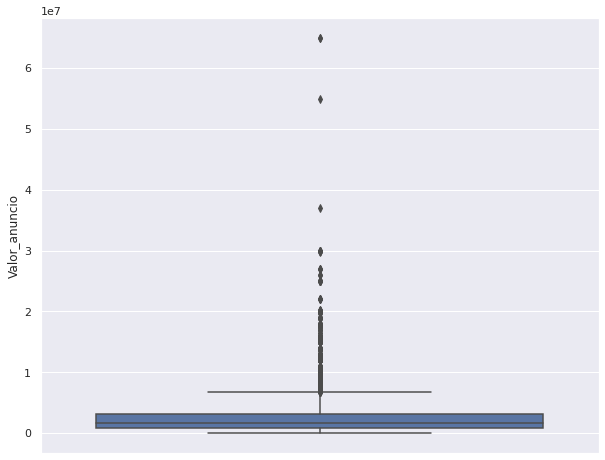

In [2]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

In [3]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


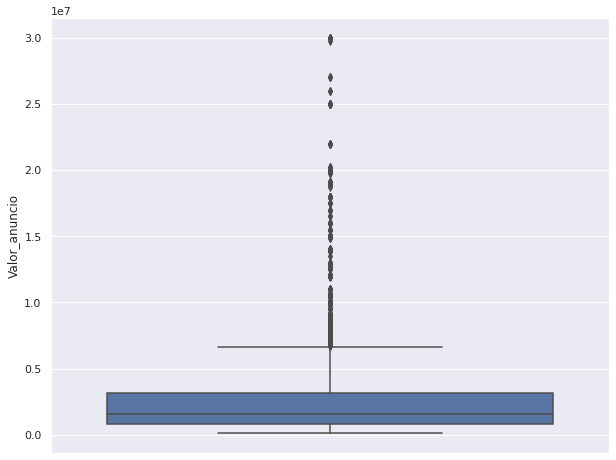

In [4]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

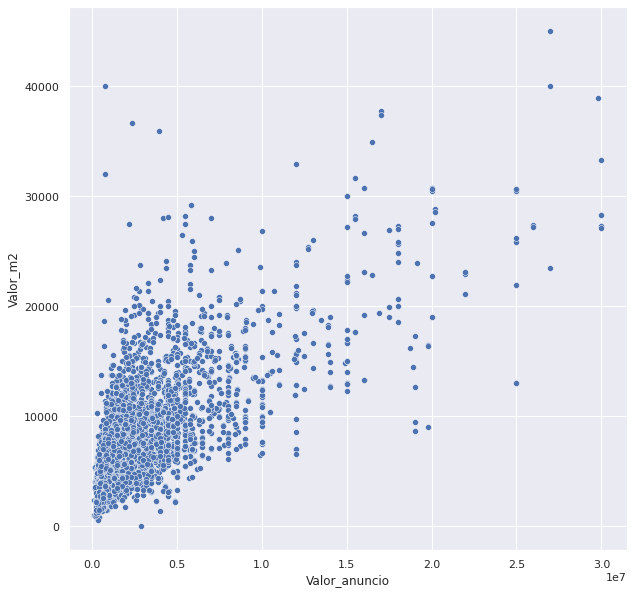

In [5]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")

# Avaliando a correlação entre as variáveis do problema

Neste passo vamos avaliar a correlação entre as variáveis e avaliar quais são variávies relevantes no contexto de regressão linenar.



In [6]:
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


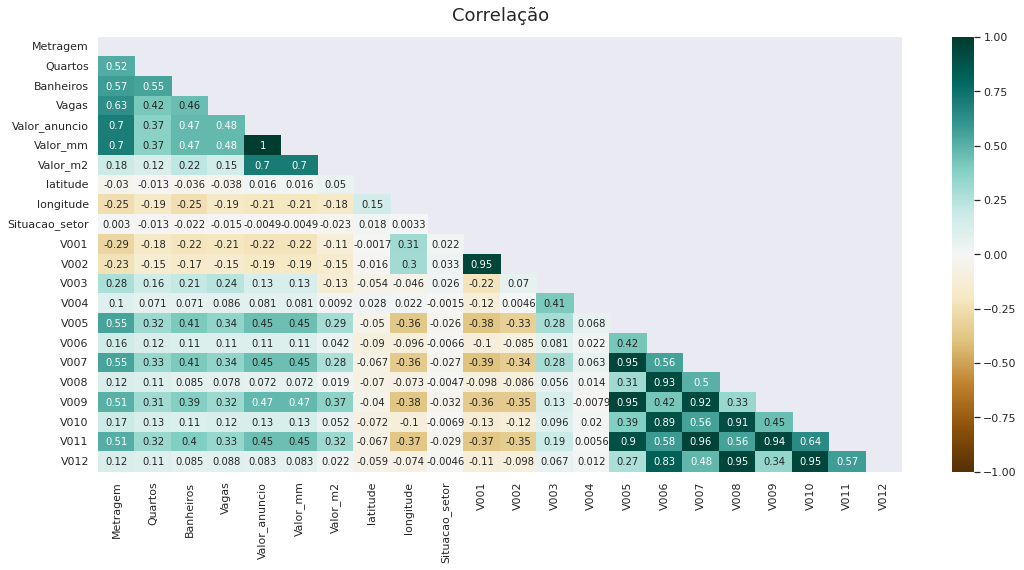

In [7]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.query("Metragem < 5000").corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.query("Metragem < 5000").corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

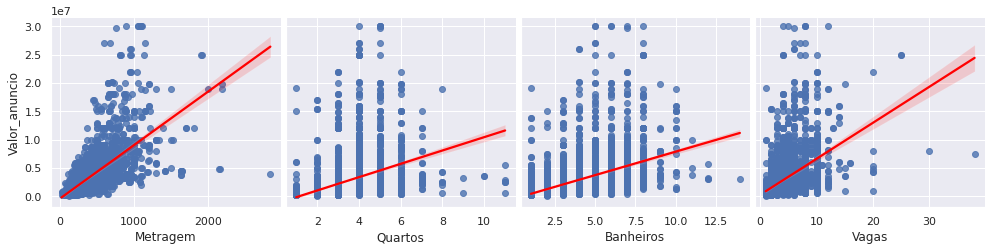

In [8]:
ax = sns.pairplot(dados_vendas_censo.query("Metragem < 35000"), y_vars= 'Valor_anuncio', x_vars=['Metragem', 'Quartos', 'Banheiros', 'Vagas'], height= 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

Removendo outliers para diminuir o grau de incerteza na correlação entre as variáveis independentes (quantidade de quartos, banheiros e vagas de garagem) e a variável dependente (Valor do anúncio)

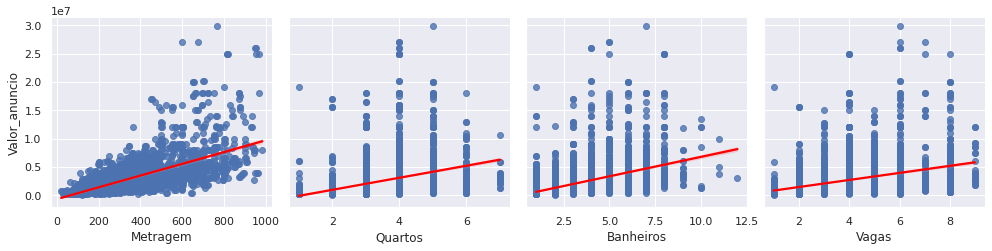

In [9]:
ax = sns.pairplot(dados_vendas_censo.query("Metragem < 1000 & Vagas < 10 & Quartos < 8"), y_vars= 'Valor_anuncio', x_vars=['Metragem', 'Quartos', 'Banheiros', 'Vagas'], height= 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

Podemos notar que não existe uma forte correlação entre as coordenadas geométricas e o valor do imóvel neste grafico:

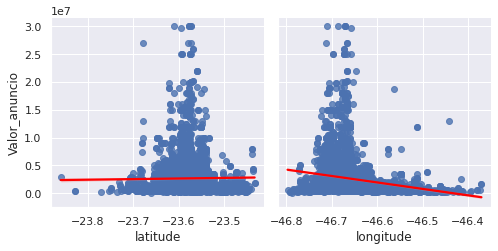

In [10]:
ax = sns.pairplot(dados_vendas_censo, y_vars= 'Valor_anuncio', x_vars=[ 'latitude', 'longitude'], height= 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

Identificando respostas do questionário do censo com alta correlação com o valor do imóvel:

V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes

V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes

V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de V002 por V001)

V004: Variância do número de moradores em domicílios particulares permanentes

V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

V006: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

V008: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

V009: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

V010: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

V011: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)

V012: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

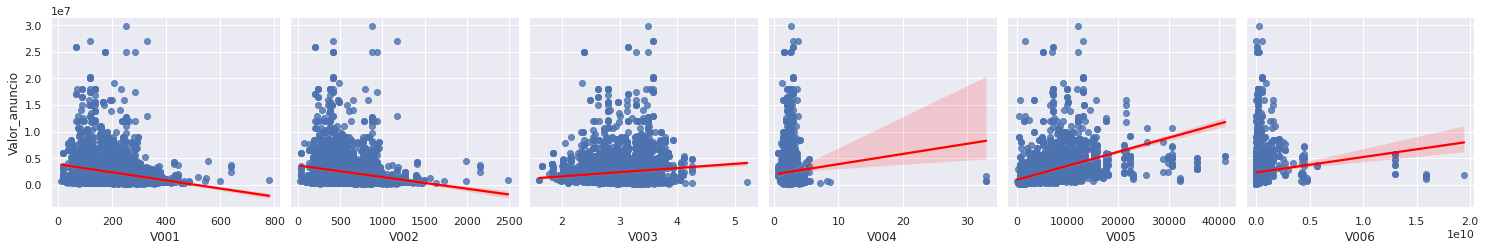

In [11]:
ax = sns.pairplot(dados_vendas_censo.query("Metragem < 1000 & Vagas < 10 & Quartos < 8"), y_vars= 'Valor_anuncio', x_vars=[ 'V001','V002', 'V003','V004','V005', 'V006'], height= 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

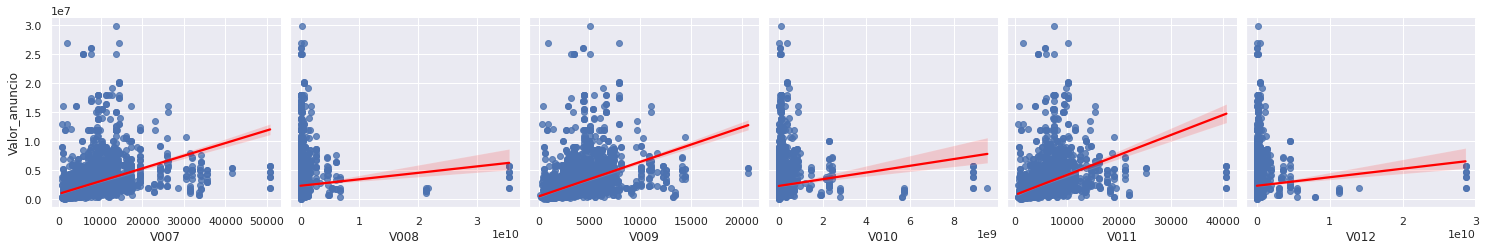

In [12]:
ax = sns.pairplot(dados_vendas_censo.query("Metragem < 1000 & Vagas < 10 & Quartos < 8"), y_vars= 'Valor_anuncio', x_vars=['V007', 'V008', 'V009', 'V010', 'V011', 'V012'], height= 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

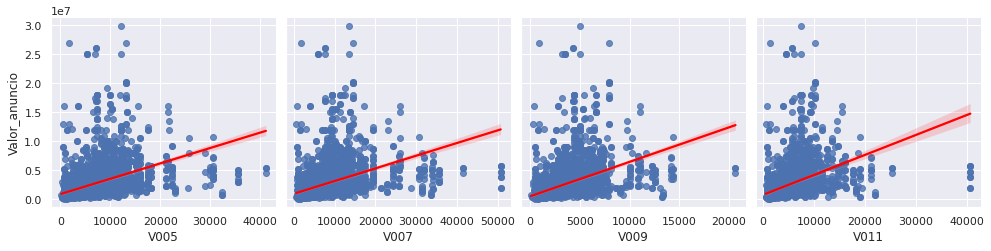

In [13]:
ax = sns.pairplot(dados_vendas_censo.query("Metragem < 1000 & Vagas < 10 & Quartos < 8"), y_vars= 'Valor_anuncio', x_vars=[ 'V005', 'V007', 'V009', 'V011'], height= 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

Eliminando outliers na variável V009 para diminuir o nivel de incerteza da correlação entre as variáveis escolhidas e o valor do imóvel.

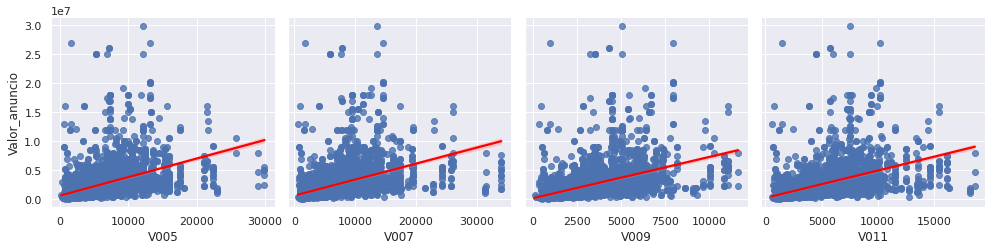

In [14]:
ax = sns.pairplot(dados_vendas_censo.query("Metragem < 1000 & Vagas < 10 & Quartos < 8 & V009 < 12000"), y_vars= 'Valor_anuncio', x_vars=[ 'V005', 'V007', 'V009', 'V011'], height= 3.5, kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

In [15]:
dados_clean = dados_vendas_censo.query("Metragem < 1000 & Vagas < 10 & Quartos < 8 & V009 < 12000")

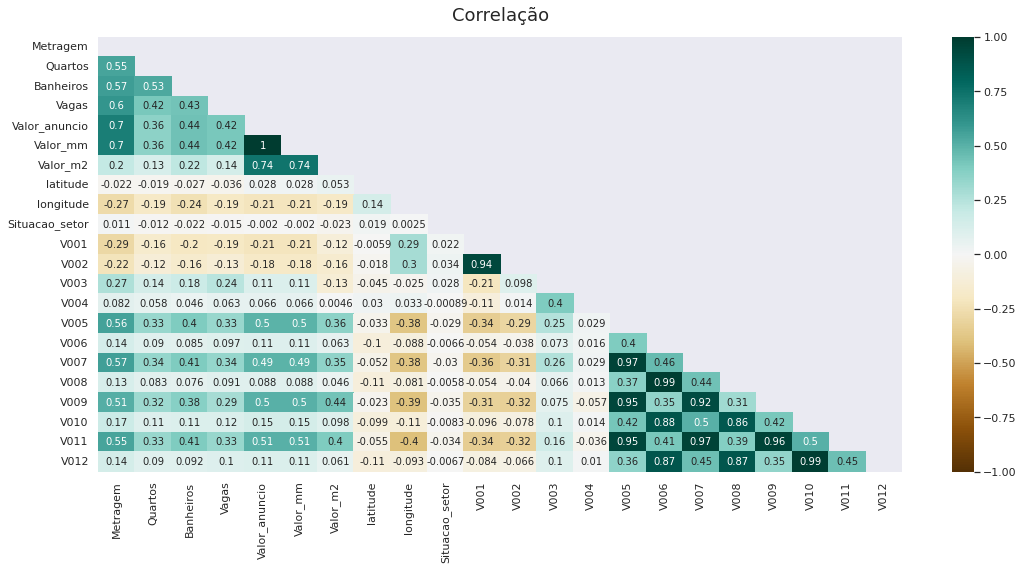

In [16]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_clean.corr(), dtype=bool))
heatmap = sns.heatmap(dados_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

## **Aplicando métodos de aprendizagem de máquina supervisionada para criar um mdoelo de predição do valor do imóvel**

Importando bibliotecas de aprendizado de maquina `scikit-lean`.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

Criando conjunto de dados para treinamento do modelo e para o teste de validação do modelo gerado.

In [19]:
Y = dados_clean["Valor_anuncio"]

X0 = dados_clean[["Metragem"]]
X0_train, X0_test, Y_train, Y_test = train_test_split(X0, Y, test_size = 0.25, random_state = 54)

X1 = dados_clean[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V009']]
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.25, random_state = 54)

X2 = dados_clean[['Metragem', 'V009']]
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.25, random_state = 54)

X3 = dados_clean[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V003', 'V005', 'V007', 'V009']]
X3_train, X3_test, Y_train, Y_test = train_test_split(X3, Y, test_size = 0.25, random_state = 54)

X4 = dados_clean[['Metragem', 'Quartos', 'latitude', 'longitude', 'Vagas', 'V003', 'V005', 'V007', 'V009']]
X4_train, X4_test, Y_train, Y_test = train_test_split(X3, Y, test_size = 0.25, random_state = 54)

Ya = dados_vendas_censo["Valor_anuncio"]
Xa = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V003', 'V005', 'V007', 'V009']]
Xa_train, Xa_test, Ya_train, Ya_test = train_test_split(Xa, Ya, test_size = 0.25, random_state = 54)

Para avaliar a eficácia dos modelos gerados vamos comparar o Mean absolute error (MAE) e o coeficiente de determinação (R2).


# Regressão Linear

Utiliando somente a metragem do imóvel como variável independente.

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(positive=True)
lr.fit(X0_train, Y_train)
Y_predict_test = lr.predict(X0_test)
Y_predict_train = lr.predict(X0_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.48810, R2 Train: 0.48551, MAE Test: 1087156.00, MAE Train: 1059578.22 


Utilizando a metragem do imóvel, quantidade de quartos, banheiros e vagas de garagem e a variavel V009 do censo.



In [37]:
lr = LinearRegression(positive=True)
lr.fit(X1_train, Y_train)
Y_predict_test = lr.predict(X1_test)
Y_predict_train = lr.predict(X1_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.51398, R2 Train: 0.51825, MAE Test: 1025095.03, MAE Train:  997792.06 


Utilizando somente a metragem do imóvel e a variavel V009 do censo.

In [38]:
lr = LinearRegression(positive=True)
lr.fit(X2_train, Y_train)
Y_predict_test = lr.predict(X2_test)
Y_predict_train = lr.predict(X2_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.51321, R2 Train: 0.51686, MAE Test: 1022656.91, MAE Train:  998244.27 


Utilizando a metragem do imóvel, quantidade de quartos, banheiros e vagas de garagem e a todas as variáveis relacionadas à renda do censo.

In [39]:
lr = LinearRegression(positive=True)
lr.fit(X3_train, Y_train)
Y_predict_test = lr.predict(X3_test)
Y_predict_train = lr.predict(X3_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.51398, R2 Train: 0.51825, MAE Test: 1025095.03, MAE Train:  997792.06 


A collinearidade entre as variáveis independentes, especialmente entre as variáveis que representam a renda do questionario do censo demonstram que a inclusão deles não tem efeito positivo no modelo gerado. O modelo que utilizou somente a variável V009 apresentou os mesmos valoes de MAE e R2.
Nenhum dos modelos apresentou eficácia expressiva na predição dos valores.

# Support Vector Machines

A regressão utilizando Support Vector Machines, para esse problema em específico apresentou resultados longe do esperado para um modelo de predição.

In [25]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X2_train, Y_train)
Y_predict_test = svr.predict(X2_test)
Y_predict_train = svr.predict(X2_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: -0.08990, R2 Train: -0.08981, MAE Test: 1522571.10, MAE Train: 1487724.55 


# Multi-layer Perceptron

Utilizando redes neurais do tipo Multi-layer perceptron apresentou em alguns casos resultados marginalmente melhores do que a regressão linear, em especial quando as variáveis foram transformadas utilizando o quartil.

In [27]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=10000, solver='lbfgs')
regr.fit(X0_train, Y_train)
Y_predict_test = regr.predict(X0_test)
Y_predict_train = regr.predict(X0_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.50182, R2 Train: 0.49656, MAE Test: 1050177.84, MAE Train: 1030284.34 


In [28]:
regr = MLPRegressor(random_state=1, max_iter=10000, solver='lbfgs')
regr.fit(X2_train, Y_train)
Y_predict_test = regr.predict(X2_test)
Y_predict_train = regr.predict(X2_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.50866, R2 Train: 0.51855, MAE Test: 1035950.93, MAE Train: 1004197.65 


In [29]:
regr = MLPRegressor(random_state=1, max_iter=10000, solver='lbfgs')
regr.fit(X3_train, Y_train)
Y_predict_test = regr.predict(X3_test)
Y_predict_train = regr.predict(X3_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.53131, R2 Train: 0.57233, MAE Test: 1078443.10, MAE Train:  999185.27 


In [30]:
regr2 = MLPRegressor(random_state=1, max_iter=10000, solver='lbfgs')
regr2.fit(X4_train, Y_train)
Y_predict_test = regr2.predict(X4_test)
Y_predict_train = regr2.predict(X4_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.53131, R2 Train: 0.57233, MAE Test: 1078443.10, MAE Train:  999185.27 


Aplicando transofrmação por quartis para uniformizar os valores mais frequentes.

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

regr = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(random_state=1, max_iter=10000, solver='lbfgs'),
    )
regr.fit(X3_train, Y_train)
Y_predict_test = regr.predict(X3_test)
Y_predict_train = regr.predict(X3_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.59045, R2 Train: 0.70280, MAE Test:  898318.21, MAE Train:  786394.67 


Incluíndo as variaveis de longitude e latitude não influenciaram o modelo de forma alguma.

In [41]:
regr = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(random_state=1, max_iter=10000, solver='lbfgs'),
    )
regr.fit(X4_train, Y_train)
Y_predict_test = regr.predict(X4_test)
Y_predict_train = regr.predict(X4_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.59045, R2 Train: 0.70280, MAE Test:  898318.21, MAE Train:  786394.67 


# Gradient Boosting
A regressão utilizando Gradient Boosting foi a que apresentou melhores resultados. Visto que a 

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": 100,
    "max_depth": 6,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    "loss": "squared_error",
}

gbr = GradientBoostingRegressor(**params);
gbr.fit(X3_train, Y_train)

Y_predict_test = gbr.predict(X3_test)
Y_predict_train = gbr.predict(X3_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Y_test, Y_predict_test), r2_score(Y_train, Y_predict_train), mean_absolute_error(Y_test, Y_predict_test), mean_absolute_error(Y_train, Y_predict_train)))

R2 Test: 0.75568, R2 Train: 0.95372, MAE Test:  661375.26, MAE Train:  380042.55 


Aplicando o mesmo método no conjunto de dados original sem a remoção de outliers é possivel verificar que o tratamento inicial dos dados é um passo fundamental para a criação de modelos preditivos eficázes.

In [42]:
gbr.fit(Xa_train, Ya_train)

Y_predict_test = gbr.predict(Xa_test)
Y_predict_train = gbr.predict(Xa_train)

print("R2 Test: %1.5f, R2 Train: %1.5f, MAE Test: %10.2f, MAE Train: %10.2f " % (r2_score(Ya_test, Ya_predict_test), r2_score(Ya_train, Ya_predict_train), mean_absolute_error(Ya_test, Ya_predict_test), mean_absolute_error(Ya_train, Ya_predict_train)))

R2 Test: 0.52274, R2 Train: 0.73241, MAE Test: 1051900.91, MAE Train:  902207.52 


## **Testando o modelo com casos reais**

In [54]:
gbr.fit(X3_train, Y_train)
Y_predict_test = gbr.predict(X3_test)
Y_predict_train = gbr.predict(X3_train)

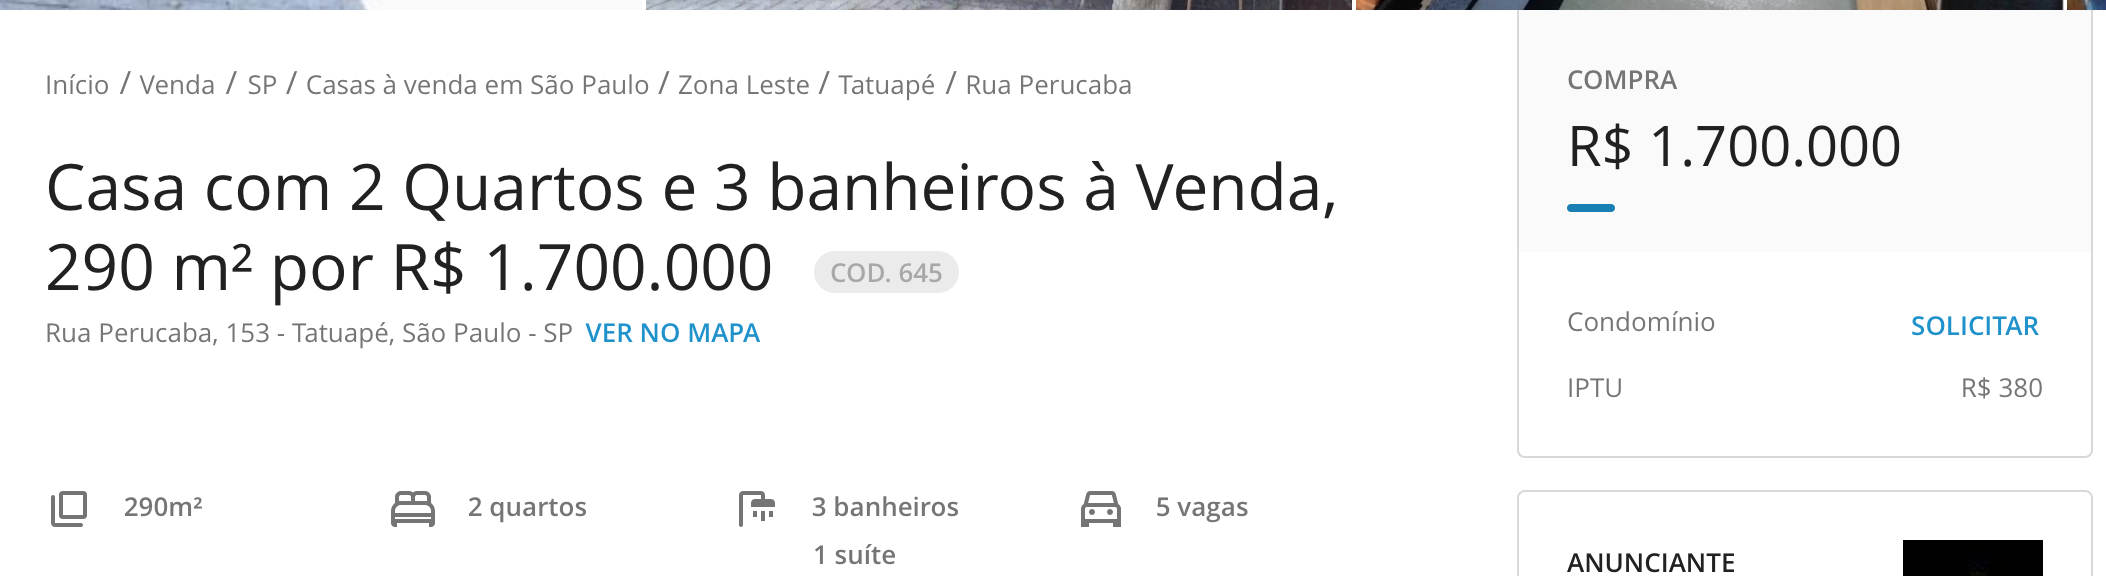

In [65]:
imovel = {'Metragem': [290], 'Quartos': 2, 'Banheiros': 3, 'Vagas': 5, 'V003': 2.81, 'V005': 3699.96, 'V007': 3878.11, 'V009': 2257.54}

gbr.predict(pd.DataFrame.from_dict(imovel))[0]

1401099.835501254

In [76]:
1401099.83/1700000

0.8241763705882353

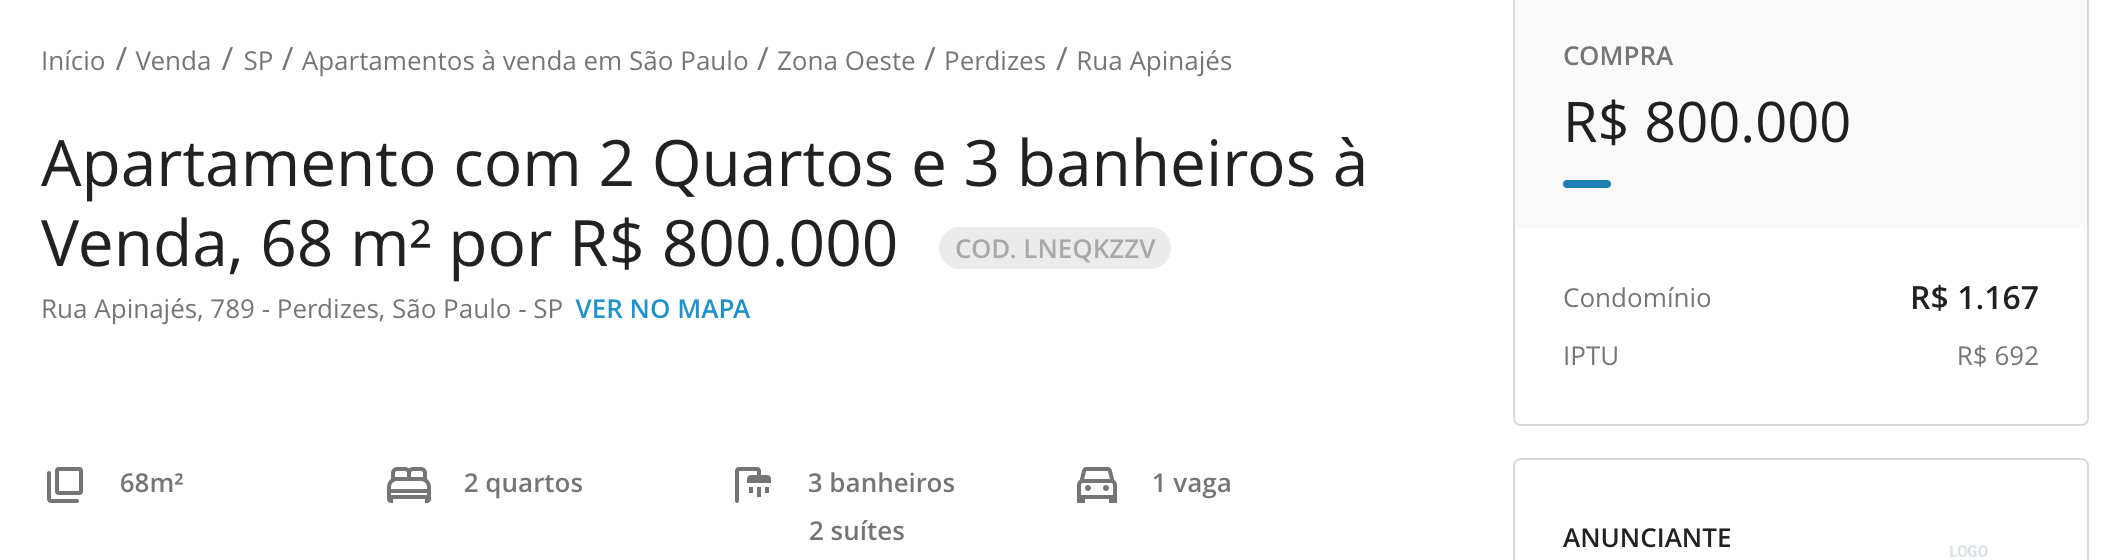

In [68]:
imovel = {'Metragem': [68], 'Quartos': 2, 'Banheiros': 3, 'Vagas': 1, 'V003': 2.97, 'V005': 5981.12, 'V007': 7161.61, 'V009': 3165.04}

gbr.predict(pd.DataFrame.from_dict(imovel))[0]

787754.2772648012

In [75]:
787754.27/800000

0.9846928375

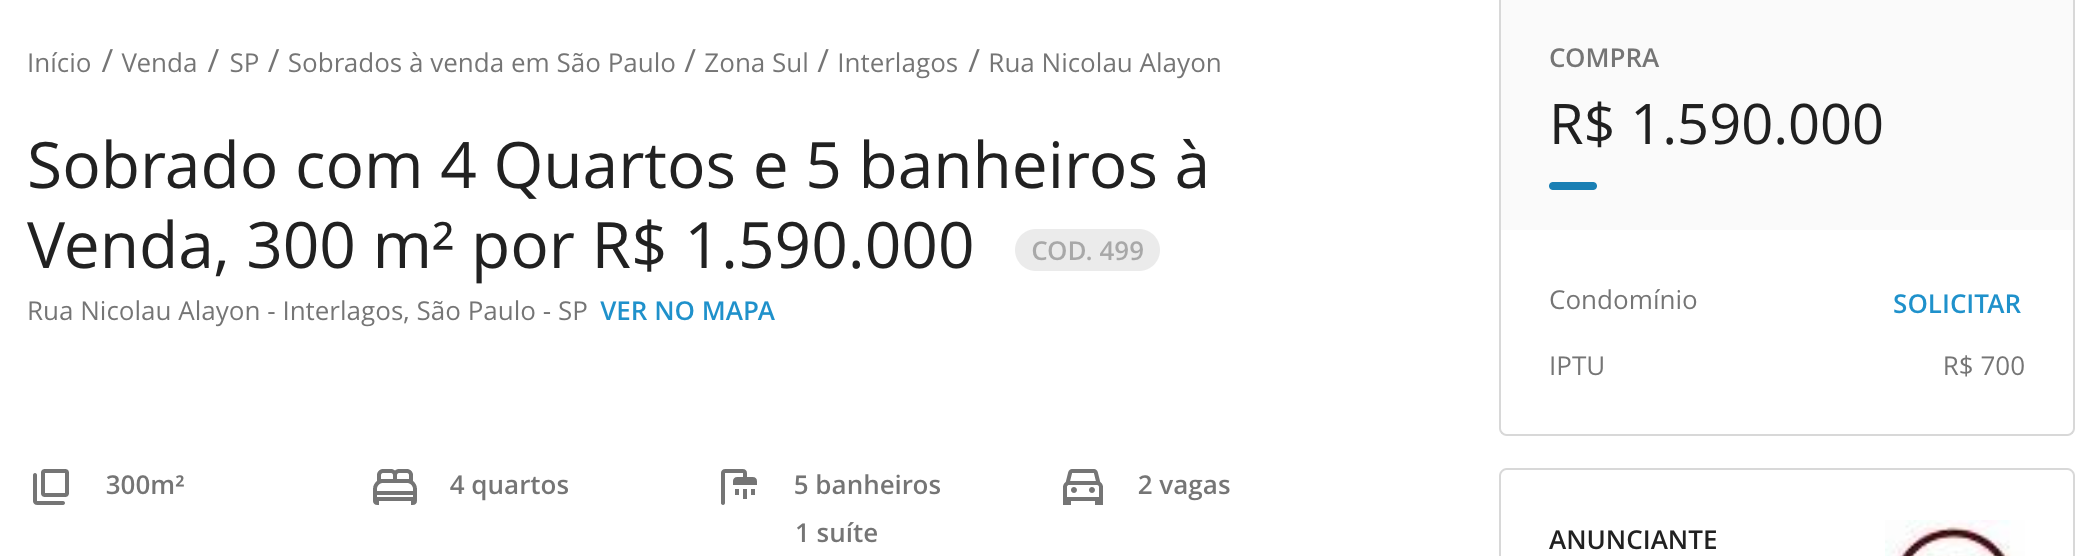

In [73]:
imovel = {'Metragem': [300], 'Quartos': 4, 'Banheiros': 5, 'Vagas': 2, 'V003': 3.66, 'V005': 5482.82, 'V007': 5858.36, 'V009': 3016.31}

gbr.predict(pd.DataFrame.from_dict(imovel))[0]

2006604.7073593957

In [74]:
1590000/2006604

0.7923835495194866

O modelo gerado utilizando os dados dos imoveis complementados com os dados do censo se mostrou bastante eficaz na predição dos valores dos imóveis.
Selecionando ao acaso 3 anúncios do site Viva Real, os valores apresentados pelo modelo ficaram relativamente proximos dos valores anuciados.